In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df=pd.read_csv("/content/Merged_data_regenerate.csv")
df.head(10)

,PN,HHID,trauma1,trauma2,trauma3,trauma4,trauma5,trauma6,trauma7,ctrauma1,...,ctrauma1.1,ctrauma3.1,ctrauma4.1,backwardcount-try1,backwardcount-try2,age,year_data,ctrauma2,discrimination6,ctrauma2.1
0,10,3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,...,1.0,5.0,5.0,1.0,NaN,70.0,2006,NaN,NaN,NaN
1,20,3,5.0,1.0,5.0,5.0,5.0,1.0,1.0,5.0,...,5.0,5.0,5.0,1.0,NaN,68.0,2006,NaN,NaN,NaN
2,10,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,67.0,2006,NaN,NaN,NaN
3,30,10003,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,...,5.0,1.0,5.0,5.0,NaN,50.0,2006,NaN,NaN,NaN
4,10,10004,5.0,1.0,1.0,5.0,1.0,1.0,5.0,5.0,...,5.0,1.0,5.0,1.0,NaN,67.0,2006,NaN,NaN,NaN
5,40,10004,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,NaN,NaN,60.0,2006,NaN,NaN,NaN
6,10,10013,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,...,5.0,5.0,1.0,1.0,NaN,68.0,2006,NaN,NaN,NaN
7,40,10013,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,NaN,NaN,59.0,2006,NaN,NaN,NaN
8,10,10038,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,1.0,NaN,70.0,2006,NaN,NaN,NaN
9,40,10038,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,NaN,NaN,63.0,2006,NaN,NaN,NaN


In [ ]:
col_names=['trauma1','trauma2',	'trauma3',	'trauma4',	'trauma5',	'trauma6',	'trauma7','ctrauma1','ctrauma2','ctrauma3','ctrauma4']
other_col=['trauma1.1','trauma2.1',	'trauma3.1',	'trauma4.1',	'trauma5.1',	'trauma6.1',	'trauma7.1','ctrauma1.1','ctrauma2.1','ctrauma3.1','ctrauma4.1']

for i,j in zip(col_names,other_col):
  print(df[i].equals(df[j]))

True
True
True
True
True
True
True
True
True
True
True


In [ ]:
df.drop(other_col,axis=1,inplace=True)

In [ ]:
df['discrimination1']=7-df['discrimination1']
df['discrimination2']=7-df['discrimination2']
df['discrimination3']=7-df['discrimination3']
df['discrimination4']=7-df['discrimination4']
df['discrimination5']=7-df['discrimination5']
df['discrimination6']=7-df['discrimination6']



In [ ]:
cond_2006 = df['year_data'] == 2006
nan_columns = ['discrimination1', 'discrimination2', 'discrimination3', 'discrimination4', 'discrimination5']

df['final_discrimination_score'] = np.where(
    cond_2006,
    np.where(
        df[nan_columns].isna().sum(axis=1) > 2,
        np.nan,
        df[nan_columns].fillna(0).sum(axis=1) / (5-df[nan_columns].isna().sum(axis=1))
    ),
    np.where(
        df[nan_columns + ['discrimination6']].isna().sum(axis=1) > 3,
        np.nan,
        df[nan_columns + ['discrimination6']].fillna(0).sum(axis=1) / (6-df[nan_columns].isna().sum(axis=1))
    )
)


In [ ]:
columns_to_replace =['trauma1','trauma2',	'trauma3',	'trauma4',	'trauma5',	'trauma6',	'trauma7']
df['Count_Missing'] = df[columns_to_replace].isnull().sum(axis=1)

In [ ]:
import numpy as np

years_to_replace = [2006, 2008, 2010, 2012]

columns_to_replace =['trauma1','trauma2',	'trauma3',	'trauma4',	'trauma5',	'trauma6',	'trauma7']

for year in years_to_replace:
    for column in columns_to_replace:
        # Create a boolean mask to identify the rows for the specified year
        mask = (df['year_data'] == year)

        # Replace NaN values in the specified column for the specified year
        df.loc[mask, column] = df.loc[mask, column].replace(5, 0)

df['trauma_score']=df['trauma1'].fillna(0)+df['trauma2'].fillna(0)+df['trauma3'].fillna(0)+df['trauma4'].fillna(0)+df['trauma5'].fillna(0)+df['trauma6'].fillna(0)+df['trauma7'].fillna(0)
df['trauma_score']=(df['trauma_score']*7)/(7-df['Count_Missing'])
for i in [2014,2016]:
        # Create a boolean mask to identify the rows for the specified year
        mask = (df['year_data'] == i)

        # Replace NaN values in the specified column for the specified year
        df.loc[mask, 'trauma_score'] = np.nan

# NaN values for 2014 and 2016 will remain unchanged


In [ ]:
cols_to_check=['trauma1','trauma2',	'trauma3',	'trauma4',	'trauma5',	'trauma6',	'trauma7']
df['trauma_score'] = df.apply(lambda row: None if all(pd.isnull(row[col]) for col in cols_to_check) else row['trauma_score'], axis=1)


In [ ]:
df.loc[df['year_data'] == 2014,'trauma_score'].unique()

array([nan])

In [ ]:
col=['ctrauma1','ctrauma2','ctrauma3','ctrauma4']

df[col]=df[col].replace({5: 0})
df['ctrauma_score']=df['ctrauma1'].fillna(0)+df['ctrauma2'].fillna(0)+df['ctrauma3'].fillna(0)+df['ctrauma4'].fillna(0)


In [ ]:
cols_to_check=['ctrauma1','ctrauma2','ctrauma3','ctrauma4']
df['ctrauma_score'] = df.apply(lambda row: None if all(pd.isnull(row[col]) for col in cols_to_check) else row['ctrauma_score'], axis=1)


In [ ]:
df['Count_Missing'] = df[col].isnull().sum(axis=1)
df['ctrauma_score']=(df['ctrauma_score']*4)/(4-df['Count_Missing'])
df.loc[df['year_data'].isin([2014, 2016]), 'ctrauma_score']=np.nan
df.loc[df['year_data']==2006,'ctrauma_score'].value_counts()
df.loc[df['ctrauma_score']==2,col]

,ctrauma1,ctrauma2,ctrauma3,ctrauma4
566,0.0,NaN,1.0,NaN
2303,NaN,NaN,1.0,0.0
2671,1.0,NaN,NaN,0.0
5064,NaN,NaN,1.0,0.0
8138,NaN,NaN,1.0,0.0
...,...,...,...,...
78023,1.0,0.0,1.0,0.0
78034,0.0,1.0,1.0,0.0
78052,1.0,0.0,1.0,0.0
78055,1.0,0.0,0.0,1.0


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'col' is the list of columns
col = ['serial1', 'serial2', 'serial3', 'serial4', 'serial5']

# Replace values 998 and 999 with 0 in the specified columns
df[col] = df[col].replace({998: 0, 999: 0})

# Initialize 'series_points' column with 0
df['series_points'] = 0

# Calculate 'series_points' based on conditions
df['series_points'] += (df['serial1'] == 93).astype(int)
df['series_points'] += ((df['serial1'] - df['serial2'] == 7) |
                       (np.isnan(df['serial1']) & (df['serial2'] == 86))).astype(int)

df['series_points'] += ((df['serial2'] - df['serial3'] == 7) |
                       (np.isnan(df['serial2']) & (df['serial3'] == 79))).astype(int)
df['series_points'] += ((df['serial3'] - df['serial4'] == 7) |
                       (np.isnan(df['serial3']) & (df['serial4'] == 72))).astype(int)
df['series_points'] += ((df['serial4'] - df['serial5'] == 7) |
                       (np.isnan(df['serial4']) & (df['serial5'] == 65))).astype(int)


In [ ]:
cols_to_check=['serial1', 'serial2', 'serial3', 'serial4', 'serial5']
df['series_points'] = df.apply(lambda row: None if all(pd.isnull(row[col]) for col in cols_to_check) else row['series_points'], axis=1)


In [ ]:
backward_points=[]
for i in df[['backwardcount-try1','backwardcount-try2']].values:
  if i[0]==1:
    backward_points.append(2)
  elif i[0]==5:
    backward_points.append(0)
  elif np.isnan(i[0]):
    backward_points.append(np.nan)
  elif i[0]==9:
    backward_points.append(0)
  else:
    if i[1]==1:
      backward_points.append(1)
    elif i[1]==5:
      backward_points.append(0)
    elif i[1]==9:
      backward_points.append(0)
    else:
      backward_points.append(np.nan)


df['backwardcount_score']=backward_points









In [ ]:
df['cognition_score']=df['backwardcount_score'].fillna(0)+df['immediate10'].fillna(0)+df['delayed10'].fillna(0)+df['series_points'].fillna(0)
df['cognition_score']=27-df['cognition_score']


In [ ]:
cols_to_check=['backwardcount_score','immediate10','delayed10','series_points']
df['cognition_score'] = df.apply(lambda row: None if all(pd.isnull(row[col]) for col in cols_to_check) else row['cognition_score'], axis=1)


In [ ]:
df[['backwardcount_score','immediate10','delayed10','series_points','cognition_score']]

,backwardcount_score,immediate10,delayed10,series_points,cognition_score
0,2.0,3.0,3.0,4.0,15.0
1,2.0,5.0,6.0,5.0,9.0
2,2.0,7.0,6.0,5.0,7.0
3,0.0,6.0,6.0,4.0,11.0
4,2.0,6.0,4.0,4.0,11.0
...,...,...,...,...,...
117928,2.0,6.0,4.0,0.0,15.0
117929,2.0,5.0,2.0,1.0,17.0
117930,2.0,6.0,5.0,5.0,9.0
117931,2.0,9.0,8.0,2.0,6.0


In [ ]:
df['vandalism']=8-df['vandalism']
df['vacancy']=8-df['vacancy']
df['safety']=8-df['safety']
df['rubbish']=8-df['rubbish']

In [ ]:
physical_disorder_score=[]
for i in df[['vandalism','vacancy','safety','rubbish']].values:
  if(np.sum(np.isnan(i))>2):
    physical_disorder_score.append(np.nan)
  else:
    physical_disorder_score.append(np.sum(np.nan_to_num(i, nan=0))/(4-np.sum(np.isnan(i))))


df['physical_disorder_score']=physical_disorder_score
df[['vandalism','vacancy','safety','rubbish']+['physical_disorder_score']]


,vandalism,vacancy,safety,rubbish,physical_disorder_score
0,7.0,7.0,1.0,1.0,4.00
1,6.0,4.0,6.0,2.0,4.50
2,NaN,NaN,NaN,NaN,NaN
3,7.0,7.0,7.0,7.0,7.00
4,4.0,3.0,4.0,4.0,3.75
...,...,...,...,...,...
117928,NaN,NaN,NaN,NaN,NaN
117929,NaN,NaN,NaN,NaN,NaN
117930,NaN,NaN,NaN,NaN,NaN
117931,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['belonging']=8-df['belonging']
df['help']=8-df['help']
df['trust']=8-df['trust']
df['friendliness']=8-df['friendliness']

In [ ]:
social_cohesion_score=[]
for i in df[['belonging','help','trust','friendliness']].values:
  if(np.sum(np.isnan(i))>2):
    social_cohesion_score.append(np.nan)
  else:
    social_cohesion_score.append(np.sum(np.nan_to_num(i, nan=0))/((4-np.sum(np.isnan(i)))))


df['social_cohesion_score']=social_cohesion_score



In [ ]:
df['sex']=df['sex'].replace({1:"Male",2:"Female"})

In [ ]:
df['race']=df['race'].replace({1:"white",2:"Black/African American",97:"Other",98:'DK',99:'RF'})

In [ ]:
df['hispanic']=df['hispanic'].replace({1:"Hispanic",5:"Non-Hispanic",8:'DK',9:'RF'})

In [ ]:
df['race_ethnicity']=df['hispanic']+" "+df['race']

In [ ]:
df['race_ethnicity'].value_counts()

Non-Hispanic white                     19374
Non-Hispanic Black/African American     6151
Hispanic white                          2560
Hispanic Other                          1283
Non-Hispanic Other                      1023
Hispanic Black/African American          131
Hispanic DK                               99
DK white                                  47
Non-Hispanic DK                           39
DK Black/African American                 29
DK Other                                  22
Non-Hispanic RF                           15
Hispanic RF                               13
RF RF                                      6
DK DK                                      5
RF white                                   2
RF Other                                   2
Name: race_ethnicity, dtype: int64

In [ ]:
df['race_ethnicity'].unique()

array(['Non-Hispanic white', 'Hispanic white', 'Non-Hispanic Other',
       'Hispanic Other', 'Non-Hispanic Black/African American',
       'Hispanic Black/African American', 'DK white', 'Hispanic RF',
       'Non-Hispanic DK', 'Non-Hispanic RF', 'DK Black/African American',
       'RF white', 'Hispanic DK', 'DK Other', 'DK DK', 'RF RF', nan,
       'RF Other'], dtype=object)

In [ ]:
temp_dict={'Hispanic white':"Hispanic",
           'Non-Hispanic Other':'Other',
          'Hispanic Other':"Hispanic",
          'Hispanic Black/African American':"Hispanic",
           'DK white':'DK/RF',
           'Hispanic RF':"Hispanic",
        'Non-Hispanic DK':'DK/RF',
            'Non-Hispanic RF':'DK/RF',
           'DK Black/African American':'DK/RF',
          'RF white':'DK/RF',
           'Hispanic DK':"Hispanic",
           'DK Other':'Other',
           'DK DK':'DK/RF',
           'RF RF':'DK/RF',
           'RF Other':'Other'

           }

In [ ]:
df['race_ethnicity']=df['race_ethnicity'].replace(temp_dict)

In [ ]:
df.columns

Index(['PN', 'HHID', 'trauma1', 'trauma2', 'trauma3', 'trauma4', 'trauma5',
       'trauma6', 'trauma7', 'ctrauma1', 'ctrauma3', 'ctrauma4',
       'discrimination1', 'discrimination2', 'discrimination3',
       'discrimination4', 'discrimination5', 'vandalism', 'rubbish', 'vacancy',
       'safety', 'belonging', 'trust', 'friendliness', 'help', 'immediate10',
       'delayed10', 'serial1', 'serial2', 'serial3', 'serial4', 'serial5',
       'selfmemory', 'birthmonth', 'birthyear', 'sex', 'education',
       'genhealth', 'USborn', 'hispanic', 'race', 'citizenship',
       'backwardcount-try1', 'backwardcount-try2', 'age', 'year_data',
       'ctrauma2', 'discrimination6', 'final_discrimination_score',
       'Count_Missing', 'trauma_score', 'ctrauma_score', 'series_points',
       'backwardcount_score', 'cognition_score', 'physical_disorder_score',
       'social_cohesion_score', 'race_ethnicity'],
      dtype='object')

In [ ]:
df['citizenship']=df['citizenship'].replace({1:'US Citizen',9:np.nan,5:'Not US Citizen',8:'DK'})

In [ ]:
df['USborn']=df['USborn'].replace({1:'US Born',9:np.nan,5:'Not born in US'})

In [ ]:
df['genhealth']=df['genhealth'].replace({8:np.nan,9:np.nan})

In [ ]:
df['selfmemory']=df['selfmemory'].replace({8:np.nan,9:np.nan})

In [ ]:
df['cognition_category']=np.nan
df.loc[df['cognition_score']<=15,'cognition_category']='Normal'
df.loc[df['cognition_score']>15,'cognition_category']='Not Normal'

In [ ]:
df[['cognition_score','cognition_category']]

,cognition_score,cognition_category
0,15.0,Normal
1,9.0,Normal
2,7.0,Normal
3,11.0,Normal
4,11.0,Normal
...,...,...
117928,15.0,Normal
117929,17.0,Not Normal
117930,9.0,Normal
117931,6.0,Normal


In [ ]:
df.to_csv('cleaned_data.csv',index=False)

<Axes: xlabel='race_ethnicity', ylabel='cognition_score'>

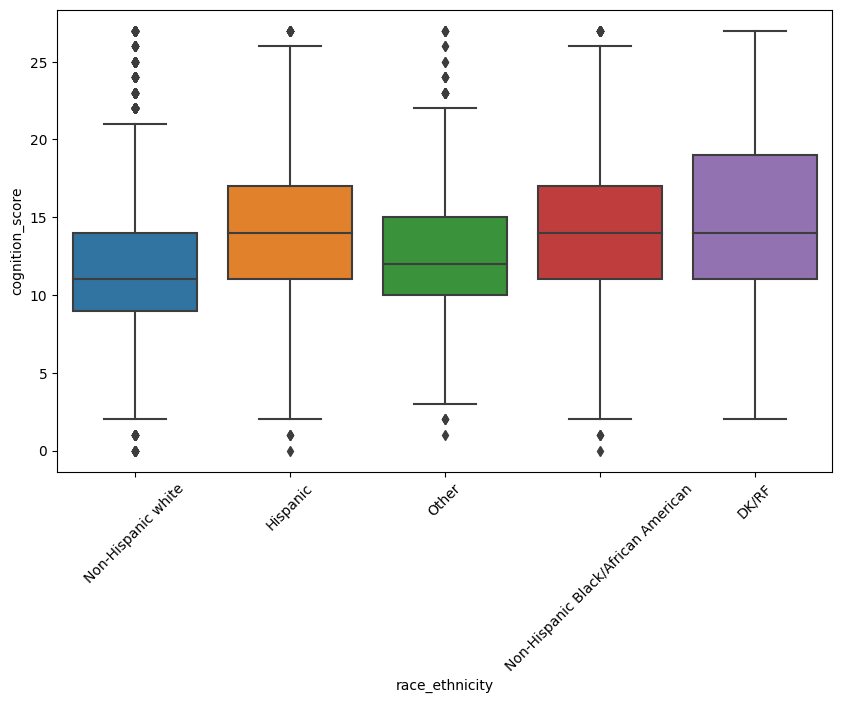

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,x='race_ethnicity',y='cognition_score')

<Axes: xlabel='physical_disorder_score', ylabel='Count'>

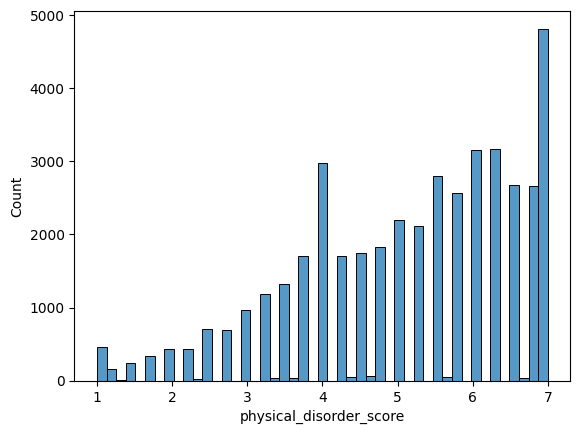

In [ ]:
sns.histplot(df['physical_disorder_score'])

<Axes: xlabel='cognition_score', ylabel='Count'>

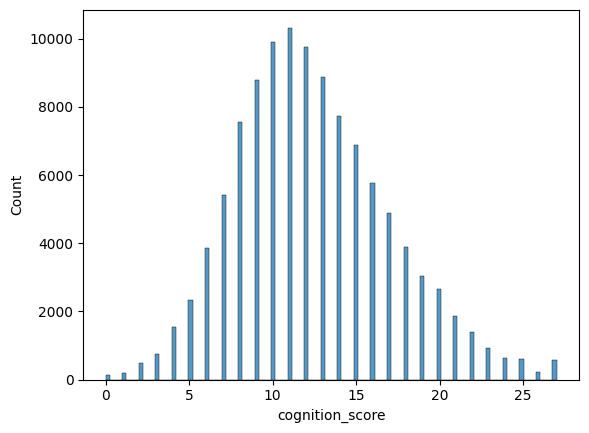

In [ ]:
sns.histplot(df['cognition_score'])

    cognition_score  average_score  sample_count
0               0.0       5.333333           123
1               1.0       5.459459           181
2               2.0       5.687037           492
3               3.0       5.578947           758
4               4.0       5.481020          1544
5               5.0       5.494726          2325
6               6.0       5.432331          3854
7               7.0       5.382533          5420
8               8.0       5.325932          7554
9               9.0       5.283240          8786
10             10.0       5.221269          9915
11             11.0       5.143266         10328
12             12.0       5.086908          9756
13             13.0       5.082261          8889
14             14.0       4.979181          7734
15             15.0       4.972709          6876
16             16.0       4.912517          5769
17             17.0       4.836497          4883
18             18.0       4.876647          3876
19             19.0 

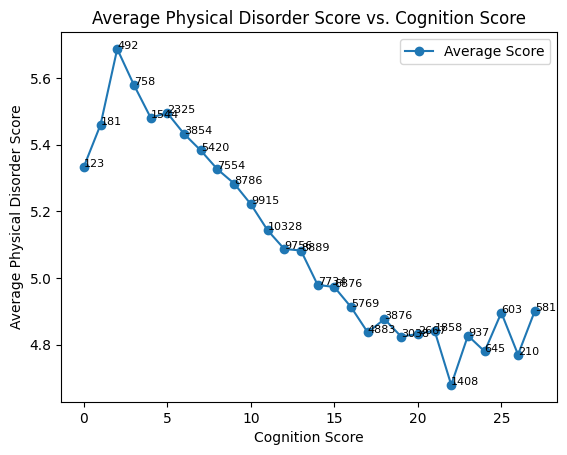

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'cognition_score' and 'physical_disorder_score' columns
average_scores = df.groupby('cognition_score')['physical_disorder_score'].mean().reset_index(name='average_score')
score_counts = df['cognition_score'].value_counts().reset_index(name='sample_count')

# Merge the DataFrames on 'cognition_score'
result_df = pd.merge(average_scores, score_counts, left_on='cognition_score', right_on='index', how='left').drop('index', axis=1)

# Print the result DataFrame
print(result_df)

# Plotting
plt.plot(result_df['cognition_score'], result_df['average_score'], marker='o', label='Average Score')
plt.xlabel('Cognition Score')
plt.ylabel('Average Physical Disorder Score')
plt.title('Average Physical Disorder Score vs. Cognition Score')
plt.legend()

# Show the count of samples as text on the plot with reduced size
for i, txt in enumerate(result_df['sample_count']):
    plt.annotate(f'{txt}', (result_df['cognition_score'].iloc[i], result_df['average_score'].iloc[i]), fontsize=8)

plt.show()


    cognition_score  average_score  sample_count
0               0.0       1.653968           123
1               1.0       1.481982           181
2               2.0       1.514216           492
3               3.0       1.509950           758
4               4.0       1.529947          1544
5               5.0       1.534051          2325
6               6.0       1.545733          3854
7               7.0       1.555597          5420
8               8.0       1.541451          7554
9               9.0       1.563894          8786
10             10.0       1.566650          9915
11             11.0       1.542344         10328
12             12.0       1.592604          9756
13             13.0       1.563376          8889
14             14.0       1.591161          7734
15             15.0       1.589064          6876
16             16.0       1.603387          5769
17             17.0       1.611632          4883
18             18.0       1.631926          3876
19             19.0 

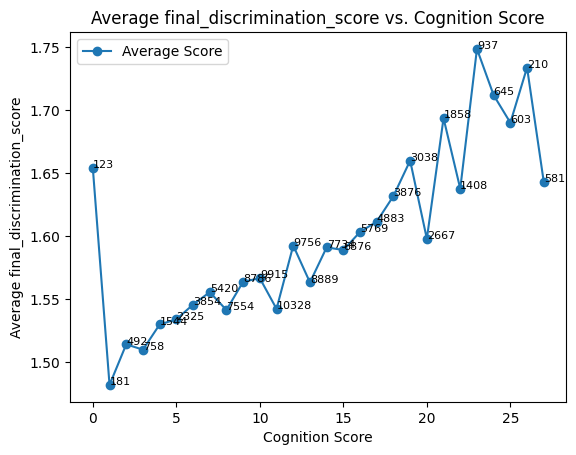

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'cognition_score' and 'physical_disorder_score' columns
average_scores = df.groupby('cognition_score')['final_discrimination_score'].mean().reset_index(name='average_score')
score_counts = df['cognition_score'].value_counts().reset_index(name='sample_count')

# Merge the DataFrames on 'cognition_score'
result_df = pd.merge(average_scores, score_counts, left_on='cognition_score', right_on='index', how='left').drop('index', axis=1)

# Print the result DataFrame
print(result_df)

# Plotting
plt.plot(result_df['cognition_score'], result_df['average_score'], marker='o', label='Average Score')
plt.xlabel('Cognition Score')
plt.ylabel('Average final_discrimination_score')
plt.title('Average final_discrimination_score vs. Cognition Score')
plt.legend()

# Show the count of samples as text on the plot with reduced size
for i, txt in enumerate(result_df['sample_count']):
    plt.annotate(f'{txt}', (result_df['cognition_score'].iloc[i], result_df['average_score'].iloc[i]), fontsize=8)

plt.show()


    cognition_score  average_score  sample_count
0               0.0       5.607143           123
1               1.0       5.432432           181
2               2.0       5.828395           492
3               3.0       5.739662           758
4               4.0       5.620848          1544
5               5.0       5.608333          2325
6               6.0       5.594376          3854
7               7.0       5.549200          5420
8               8.0       5.492896          7554
9               9.0       5.449238          8786
10             10.0       5.390510          9915
11             11.0       5.334436         10328
12             12.0       5.304789          9756
13             13.0       5.273803          8889
14             14.0       5.179461          7734
15             15.0       5.157068          6876
16             16.0       5.144134          5769
17             17.0       5.010981          4883
18             18.0       5.085631          3876
19             19.0 

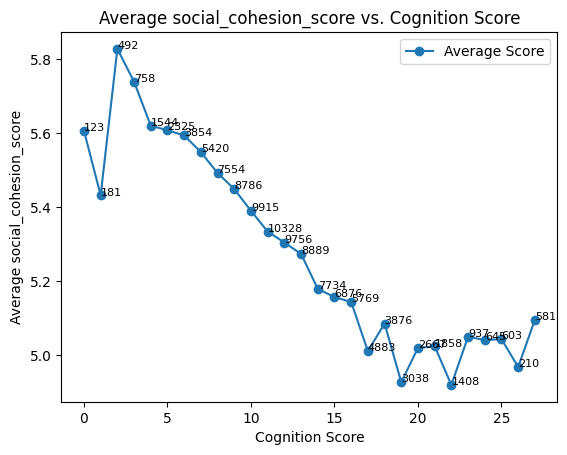

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'cognition_score' and 'social_cohesion_score' columns
average_scores = df.groupby('cognition_score')['social_cohesion_score'].mean().reset_index(name='average_score')
score_counts = df['cognition_score'].value_counts().reset_index(name='sample_count')

# Merge the DataFrames on 'cognition_score'
result_df = pd.merge(average_scores, score_counts, left_on='cognition_score', right_on='index', how='left').drop('index', axis=1)

# Print the result DataFrame
print(result_df)

# Plotting
plt.plot(result_df['cognition_score'], result_df['average_score'], marker='o', label='Average Score')
plt.xlabel('Cognition Score')
plt.ylabel('Average social_cohesion_score')
plt.title('Average social_cohesion_score vs. Cognition Score')
plt.legend()

# Show the count of samples as text on the plot with reduced size
for i, txt in enumerate(result_df['sample_count']):
    plt.annotate(f'{txt}', (result_df['cognition_score'].iloc[i], result_df['average_score'].iloc[i]), fontsize=8)

plt.show()


    social_cohesion_score  average_score  sample_count
0                1.000000       1.618382           343
1                1.250000       1.960784           119
2                1.333333       1.777778             4
3                1.500000       2.129340           192
4                1.666667       2.564815             9
5                1.750000       2.256173           270
6                2.000000       2.517662           336
7                2.250000       2.654155           373
8                2.333333       3.333333             7
9                2.500000       2.842267           572
10               2.666667       4.133333            12
11               2.750000       3.161306           514
12               3.000000       3.284016           712
13               3.250000       3.412087           839
14               3.333333       3.267544            20
15               3.500000       3.624957           962
16               3.666667       3.934211            19
17        

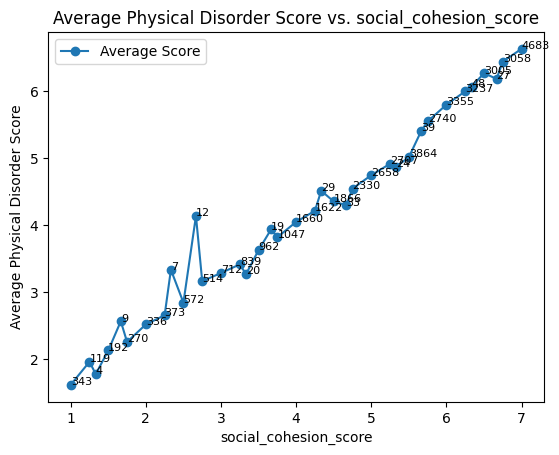

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'cognition_score' and 'physical_disorder_score' columns
average_scores = df.groupby('social_cohesion_score')['physical_disorder_score'].mean().reset_index(name='average_score')
score_counts = df['social_cohesion_score'].value_counts().reset_index(name='sample_count')

# Merge the DataFrames on 'cognition_score'
result_df = pd.merge(average_scores, score_counts, left_on='social_cohesion_score', right_on='index', how='left').drop('index', axis=1)

# Print the result DataFrame
print(result_df)

# Plotting
plt.plot(result_df['social_cohesion_score'], result_df['average_score'], marker='o', label='Average Score')
plt.xlabel('social_cohesion_score')
plt.ylabel('Average Physical Disorder Score')
plt.title('Average Physical Disorder Score vs. social_cohesion_score')
plt.legend()

# Show the count of samples as text on the plot with reduced size
for i, txt in enumerate(result_df['sample_count']):
    plt.annotate(f'{txt}', (result_df['social_cohesion_score'].iloc[i], result_df['average_score'].iloc[i]), fontsize=8)

plt.show()


In [ ]:
df.columns

Index(['PN', 'HHID', 'trauma1', 'trauma2', 'trauma3', 'trauma4', 'trauma5',
       'trauma6', 'trauma7', 'ctrauma1', 'ctrauma3', 'ctrauma4',
       'discrimination1', 'discrimination2', 'discrimination3',
       'discrimination4', 'discrimination5', 'vandalism', 'rubbish', 'vacancy',
       'safety', 'belonging', 'trust', 'friendliness', 'help', 'immediate10',
       'delayed10', 'serial1', 'serial2', 'serial3', 'serial4', 'serial5',
       'selfmemory', 'birthmonth', 'birthyear', 'sex', 'education',
       'genhealth', 'USborn', 'hispanic', 'race', 'citizenship',
       'backwardcount-try1', 'backwardcount-try2', 'age', 'year_data',
       'ctrauma2', 'discrimination6', 'final_discrimination_score',
       'Count_Missing', 'trauma_score', 'ctrauma_score', 'series_points',
       'backwardcount_score', 'cognition_score', 'physical_disorder_score',
       'social_cohesion_score', 'race_ethnicity', 'cognition_category'],
      dtype='object')

In [ ]:
for i in df['USborn'].unique():
  mask=df['USborn']==i
  print('For USborn = ',i)
  print('Average: ',df.loc[mask,'cognition_score'].mean())
  print('SD: ',df.loc[mask,'cognition_score'].std(),'\n')

For USborn =  nan
Average:  nan
SD:  nan 

For USborn =  Not born in US
Average:  12.72093949044586
SD:  4.1202252252916525 

For USborn =  US Born
Average:  11.496269060235752
SD:  4.171424339111844 



In [ ]:
import pandas as pd
from scipy.stats import f_oneway
df_dropped=df[['USborn','cognition_score']].dropna()
# Assuming df is your DataFrame with 'group_variable' as the categorical variable and 'score_variable' as the continuous variable
groups = [1,5]

# Perform ANOVA
anova_results = f_oneway(*(df_dropped[df_dropped['USborn'] == group]['cognition_score'] for group in groups))

# Display the ANOVA results
print("ANOVA Results:")
print(anova_results)

# Check the p-value to determine if there are significant differences
if anova_results.pvalue < 0.05:
    print("There are significant differences between groups.")
else:
    print("There are no significant differences between groups.")


ANOVA Results:
F_onewayResult(statistic=nan, pvalue=nan)
There are no significant differences between groups.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
df_dropped=df[['race_ethnicity','cognition_score']].dropna()
# Assuming df is your DataFrame with 'group_variable' as the categorical variable and 'score_variable' as the continuous variable
groups = df_dropped['race_ethnicity'].unique()

# Perform ANOVA
anova_results = f_oneway(*(df_dropped[df_dropped['race_ethnicity'] == group]['cognition_score'] for group in groups))

# Display the ANOVA results
print("ANOVA Results:")
print(anova_results)

# Check the p-value to determine if there are significant differences
if anova_results.pvalue < 0.05:
    print("There are significant differences between groups.")
else:
    print("There are no significant differences between groups.")


ANOVA Results:
F_onewayResult(statistic=481.29968160168426, pvalue=0.0)
There are significant differences between groups.


    cognition_score  average_score  sample_count
0               0.0       2.349593           123
1               1.0       2.320442           181
2               2.0       2.388211           492
3               3.0       2.476253           758
4               4.0       2.539209          1544
5               5.0       2.587349          2325
6               6.0       2.634311          3854
7               7.0       2.677491          5420
8               8.0       2.752483          7554
9               9.0       2.802528          8786
10             10.0       2.862563          9915
11             11.0       2.933062         10328
12             12.0       3.012417          9756
13             13.0       3.050422          8889
14             14.0       3.124709          7734
15             15.0       3.158906          6876
16             16.0       3.229221          5769
17             17.0       3.249949          4883
18             18.0       3.328856          3876
19             19.0 

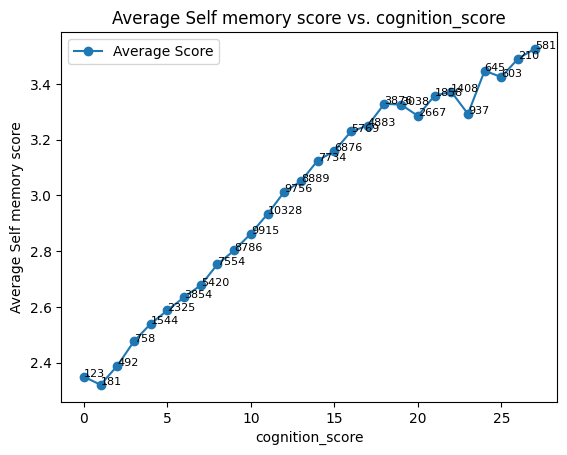

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'cognition_score' and 'physical_disorder_score' columns
average_scores = df.groupby('cognition_score')['selfmemory'].mean().reset_index(name='average_score')
score_counts = df['cognition_score'].value_counts().reset_index(name='sample_count')

# Merge the DataFrames on 'cognition_score'
result_df = pd.merge(average_scores, score_counts, left_on='cognition_score', right_on='index', how='left').drop('index', axis=1)

# Print the result DataFrame
print(result_df)

# Plotting
plt.plot(result_df['cognition_score'], result_df['average_score'], marker='o', label='Average Score')
plt.xlabel('cognition_score')
plt.ylabel('Average Self memory score')
plt.title('Average Self memory score vs. cognition_score')
plt.legend()

# Show the count of samples as text on the plot with reduced size
for i, txt in enumerate(result_df['sample_count']):
    plt.annotate(f'{txt}', (result_df['cognition_score'].iloc[i], result_df['average_score'].iloc[i]), fontsize=8)

plt.show()
